## Logistic Regression

Breast Cancer data from [the UCI repository](http://archive.ics.uci.edu/ml/datasets/Breast+Cancer+Wisconsin+%28Diagnostic%29) contains records corresponding to 
cases of observed tumors.   There are a number of observations for each and a categorisation in the `class` column: 2 for benign (good), 4 for malignant (bad).  Your task is to build a logistic regression model to classify these cases. 

The data is provided as a CSV file.  There are a small number of cases where no value is available, these are indicated in the data with `?`. I have used the `na_values` keyword for `read_csv` to have these interpreted as `NaN` (Not a Number).  Your first task is to decide what to do with these rows. You could just drop these rows or you could [impute them from the other data](http://scikit-learn.org/stable/modules/preprocessing.html#imputation-of-missing-values).

You then need to follow the procedure outlined in the lecture for generating a train/test set, building and evaluating a model. Your goal is to build the best model possible over this data.   Your first step should be to build a logistic regression model using all of the features that are available.
  

In [24]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline
from sklearn.model_selection import train_test_split
from sklearn import linear_model
from sklearn.metrics import r2_score
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import confusion_matrix, accuracy_score
from sklearn.feature_selection import RFE

In [25]:
bcancer = pd.read_csv("files/breast-cancer-wisconsin.csv", na_values="?")
bcancer.head()

,sample_code_number,clump_thickness,uniformity_cell_size,uniformity_cell_shape,marginal_adhesion,single_epithelial_cell_size,bare_nuclei,bland_chromatin,normal_nucleoli,mitoses,class
0,1000025,5,1,1,1,2,1.0,3,1,1,2
1,1002945,5,4,4,5,7,10.0,3,2,1,2
2,1015425,3,1,1,1,2,2.0,3,1,1,2
3,1016277,6,8,8,1,3,4.0,3,7,1,2
4,1017023,4,1,1,3,2,1.0,3,1,1,2


In [26]:
# deal with the NaN values in the data
print(bcancer.isnull().values.any())

True


In [27]:
bcancer1=bcancer.dropna()
bcancer1

,sample_code_number,clump_thickness,uniformity_cell_size,uniformity_cell_shape,marginal_adhesion,single_epithelial_cell_size,bare_nuclei,bland_chromatin,normal_nucleoli,mitoses,class
0,1000025,5,1,1,1,2,1.0,3,1,1,2
1,1002945,5,4,4,5,7,10.0,3,2,1,2
2,1015425,3,1,1,1,2,2.0,3,1,1,2
3,1016277,6,8,8,1,3,4.0,3,7,1,2
4,1017023,4,1,1,3,2,1.0,3,1,1,2
...,...,...,...,...,...,...,...,...,...,...,...
694,776715,3,1,1,1,3,2.0,1,1,1,2
695,841769,2,1,1,1,2,1.0,1,1,1,2
696,888820,5,10,10,3,7,3.0,8,10,2,4
697,897471,4,8,6,4,3,4.0,10,6,1,4


In [28]:
bcancer1.shape

(683, 11)

In [29]:
bcancer1.columns

Index(['sample_code_number', 'clump_thickness', 'uniformity_cell_size',
       'uniformity_cell_shape', 'marginal_adhesion',
       'single_epithelial_cell_size', 'bare_nuclei', 'bland_chromatin',
       'normal_nucleoli', 'mitoses', 'class'],
      dtype='object')

In [30]:
print(bcancer1.head())

   sample_code_number  clump_thickness  uniformity_cell_size  \
0             1000025                5                     1   
1             1002945                5                     4   
2             1015425                3                     1   
3             1016277                6                     8   
4             1017023                4                     1   

   uniformity_cell_shape  marginal_adhesion  single_epithelial_cell_size  \
0                      1                  1                            2   
1                      4                  5                            7   
2                      1                  1                            2   
3                      8                  1                            3   
4                      1                  3                            2   

   bare_nuclei  bland_chromatin  normal_nucleoli  mitoses  class  
0          1.0                3                1        1      2  
1         10.0          

In [31]:
bcancer1.groupby('class').size()

class
2    444
4    239
dtype: int64

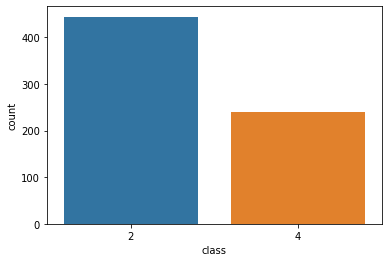

In [32]:
# Examine the data, look at the statistical summary etc.
sns.countplot(bcancer1['class'], label="count")

In [33]:
# Build your first model - defining training and test data sets then use Logistic Regression to build a model
x_train, x_test, y_train, y_test = train_test_split(bcancer1.drop(columns=['class', 'sample_code_number'], axis=1), bcancer1['class'], stratify=bcancer1['class'], random_state=7)
print("x_train shape:", x_train.shape)
print("x_test shape:", x_test.shape)
print("y_train shape:", y_train.shape)
print("y_test shape:", y_test.shape)

x_train shape: (512, 9)
x_test shape: (171, 9)
y_train shape: (512,)
y_test shape: (171,)


In [34]:
#Building First model using Logistic Regression
#training model
lr = LogisticRegression().fit(x_train, y_train)
lr

C:\Users\Raza\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)


LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='warn', n_jobs=None, penalty='l2',
                   random_state=None, solver='warn', tol=0.0001, verbose=0,
                   warm_start=False)

In [35]:
#Evaluating trained model on training and test set
# making predictions on training and test set
y_pred_train = lr.predict(x_train)
y_pred_test = lr.predict(x_test)


### Evaluation

To evaluate a classification model we want to look at how many cases were correctly classified and how many
were in error.  In this case we have two outcomes - benign and malignant.   SKlearn has some useful tools, the 
[accuracy_score]() function gives a score from 0-1 for the proportion correct.  The 
[confusion_matrix](http://scikit-learn.org/stable/modules/model_evaluation.html#confusion-matrix) function 
shows how many were classified correctly and what errors were made.  Use these to summarise the performance of 
your model (these functions have already been imported above).

In [36]:
# Evaluate the model
#calculating accuracy score on training set
print("Acc on training set:", accuracy_score(y_train, y_pred_train))

#calculating accuracy score on test set
print("Acc on test set:", accuracy_score(y_test, y_pred_test))

Acc on training set: 0.97265625
Acc on test set: 0.9707602339181286


In [37]:
#Evaluation on train data and test data
print("acc score o train data:", accuracy_score(y_train, y_pred_train))
print("\n")
print(confusion_matrix(y_train, y_pred_train))

acc score o train data: 0.97265625


[[327   6]
 [  8 171]]


In [38]:
#Evaluation on test data
print("acc score o test data:", accuracy_score(y_test, y_pred_test))
print("\n")
print(confusion_matrix(y_test, y_pred_test))

acc score o test data: 0.9707602339181286


[[108   3]
 [  2  58]]


### Checkpoint

The checkpoint for this week workshop is to report accuracy on training and test set. Also, provide the confusion matrix to check for which class model is doing good and where error were are made. Based on these results, provide explaination about:
- Can we deploy this trained model in hospital's settings?
- Is model overfitting?
- For which class model is making error? Read about False Positive Rate (FPR) and False Negative Rate (FNR)

**On iLearn under Practical Week 6, make your submission in the form of results and their interpretation (1 paragraph) to get mark for this week checkpoint.**

### Feature Selection

Since you have many features available, one part of building the best model will be to select which features to use as input to the classifier. Your initial model used all of the features but it is possible that a better model can 
be built by leaving some of them out.   Test this by building a few models with subsets of the features - how do your models perform? 

This process can be automated.  The [sklearn RFE function](http://scikit-learn.org/stable/modules/feature_selection.html#recursive-feature-elimination) implements __Recursive Feature Estimation__ which removes 
features one by one, evaluating the model each time and selecting the best model for a target number of features.  Use RFE to select features for a model with 3, 4 and 5 features - can you build a model that is as good or better than your initial model?

## Conclusion

Write a brief conclusion to your experiment.  You might comment on the proportion of __false positive__ and __false negative__ classifications your model makes.  How useful would this model be in a clinical diagnostic setting? 